# 1. Extract results

In [1]:
import sys

sys.path.append("../../")
from _analysis._rule_app_analysis import automatic_results, save_results_to_json

In [2]:
from typing import *
from _analysis._rule_app_analysis import load_database, coverage_rate
def automatic_results(
    test_types: List[str],
    temp_types: List[str],
    predict_types: List[str],
    radii: List[int],
    base_path="../../Data/Temp/Benchmark",
) -> Dict[str, Dict[str, Tuple[float, float, float]]]:
    """
    Automatically computes coverage rates for combinations of test type, template type,
    predict type, and radii. Iterates over the provided parameter lists, loads data,
    and computes statistics.

    Parameters:
    - test_types (List[str]): List of test types.
    - temp_types (List[str]): List of template types.
    - predict_types (List[str]): List of prediction types.
    - radii (List[int]): List of radii values.
    - base_path (str): path to data

    Returns:
    - Dict[str, Dict[str, Tuple[float, float, float]]]: A dictionary where the key
    is the test type and the value is another dictionary. The inner dictionary's keys are
    combinations of parameters as strings, and its values are tuples with the results from
    `coverage_rate` (average solutions, coverage rate, false positive rate).
    """
    all_results = {}

    for test in test_types:
        test_results = {}
        for predict in predict_types:
            predict_results = {}
            for temp in temp_types:
                for rad in radii:
                    path = f"{base_path}/{temp}/Output/{test}/{predict}_{rad}.json.gz"
                    name = f"{temp}_{rad}"
                    data = load_database(path)
                    if data:
                        predict_results[name] = coverage_rate(data)
                    else:
                        predict_results[name] = (0.0, 0.0, 0.0)
            test_results[predict] = predict_results
        all_results[test] = test_results

    return all_results

In [6]:
base_path = "../../Data/Temp/Benchmark/"
test_types = ["Valid"]
# temp_types = ["Raw", "Complete", "Complete_expand", "Refine", "Refine_expand"]
temp_types = ["Raw", "Complete", "Refine"]
predict_types = ["fw", "bw"]
radius = [0, 1, 2, 3]
# radius = [0, 1]
results = automatic_results(test_types, temp_types, predict_types, radius, base_path)

In [7]:
results

{'Valid': {'fw': {'Raw_0': (4.04, 7.86, 94.87),
   'Raw_1': (0.79, 7.24, 78.52),
   'Raw_2': (0.33, 6.5, 69.74),
   'Raw_3': (0.23, 4.92, 68.67),
   'Complete_0': (71.13, 94.5, 97.18),
   'Complete_1': (22.88, 92.92, 89.08),
   'Complete_2': (5.3, 88.6, 67.5),
   'Complete_3': (3.22, 78.03, 58.88),
   'Refine_0': (84.29, 94.7, 97.66),
   'Refine_1': (23.78, 93.16, 89.58),
   'Refine_2': (5.73, 89.12, 68.68),
   'Refine_3': (3.3, 78.93, 58.97)},
  'bw': {'Raw_0': (4.58, 7.86, 97.99),
   'Raw_1': (0.61, 7.24, 84.84),
   'Raw_2': (0.35, 6.5, 73.3),
   'Raw_3': (0.2, 4.92, 64.07),
   'Complete_0': (73.26, 93.46, 97.86),
   'Complete_1': (22.0, 92.84, 92.98),
   'Complete_2': (13.92, 88.5, 89.29),
   'Complete_3': (9.4, 77.97, 85.12),
   'Refine_0': (93.4, 93.66, 98.11),
   'Refine_1': (22.51, 93.08, 93.13),
   'Refine_2': (14.55, 89.02, 89.43),
   'Refine_3': (9.78, 78.87, 85.2)}}}

In [10]:
save_results_to_json(results, "../../Data/Temp/Benchmark/raw_results.json")

Results successfully saved to ../../Data/Temp/Benchmark/raw_results.json


In [9]:
import pandas as pd
results_df = pd.DataFrame(results['Valid']['fw'])
results_df.T

,0,1,2
Raw_0,4.04,7.86,94.87
Raw_1,0.79,7.24,78.52
Raw_2,0.33,6.50,69.74
Raw_3,0.23,4.92,68.67
Complete_0,71.13,94.50,97.18
Complete_1,22.88,92.92,89.08
Complete_2,5.30,88.60,67.50
Complete_3,3.22,78.03,58.88
Refine_0,84.29,94.70,97.66
Refine_1,23.78,93.16,89.58


In [ ]:
import pandas as pd
results_df = pd.DataFrame(results['Valid']['bw'])
results_df

## 2. Barplot

In [48]:
import sys

sys.path.append("../../")
from _analysis._rule_app_analysis import load_results_from_json

results = load_results_from_json("../../Data/Temp/Benchmark/raw_results.json")

Results successfully loaded from ../../Data/Temp/Benchmark/raw_results.json


In [49]:
import pandas as pd

valid = results["Valid"]
valid_fw = valid["fw"]
valid_bw = valid["bw"]
fw = pd.DataFrame(valid_fw).T
bw = pd.DataFrame(valid_bw).T
fw.rename(
    columns={
        0: "average_solution",
        # 1: r'\mathcal(C)',
        1: "C",
        2: "NR",
    },
    inplace=True,
)
bw.rename(
    columns={
        0: "average_solution",
        # 1: r'\mathcal(C)',
        1: "C",
        2: "NR",
    },
    inplace=True,
)

In [50]:
from _analysis._rule_app_analysis import plot_percentage

In [51]:
fw['Type'].unique()

KeyError: 'Type'

In [52]:
def plot_percentage(
    df: pd.DataFrame,
    ax: plt.Axes,
    column: str,
    title: str = "A",
    color_map: Optional[List[str]] = None,
    fontsettings: Optional[Dict[str, int]] = None,
) -> None:
    """
    Plot a percentage bar chart for different categories and subcategories within the data.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data to plot. Index of the DataFrame
                       should be string labels in the format 'category_subcategory'.
    ax (plt.Axes): Matplotlib Axes object where the chart will be drawn.
    column (str): Column name in df that contains the percentage values to plot.
    title (str, optional): Title of the plot. Default is 'A'.
    color_map (List[str], optional): List of hex color strings for the bars. If None,
                                     a default set of colors will be used.
    fontsettings (Dict[str, int], optional): Dictionary containing font size settings
                                             for various elements of the plot. If None,
                                             default settings are applied.

    Returns:
    None: This function does not return any value but modifies the ax object by drawing a bar chart.

    Example:
    >>> fig, ax = plt.subplots()
    >>> data = pd.DataFrame({'Value': [20, 30, 40, 50]}, index=['Type1_10', 'Type1_20', 'Type2_10', 'Type2_20'])
    >>> plot_percentage(data, ax, 'Value')
    >>> plt.show()
    """
    if fontsettings is None:
        fontsettings = {
            "title_size": 18,
            "label_size": 16,
            "ticks_size": 16,
            "annotation_size": 12,
        }

    # Split the index into template type and radii
    df["Type"] = [i.split("_")[0] for i in df.index]
    df["Radii"] = [int(i.split("_")[1]) for i in df.index]

    # Sort data to group by type and then by radii
    df = df.sort_values(by=["Radii"])

    # Prepare color map for radii using coolwarm
    if color_map is None:
        color_map = ["#3A8EBA", "#92C5DE", "#F4A582", "#D6604D"]

    # Plotting logic with annotations
    total_width = 3  # Total width for group
    width = total_width / len(
        df["Radii"].unique()
    )  # Width for each bar within each type group
    type_positions = np.arange(len(df["Type"].unique())) * (
        len(df["Radii"].unique()) + 1
    )

    for i, t in enumerate(df["Type"].unique()):
        for j, r in enumerate(df["Radii"].unique()):
            #print(t)
            bar_positions = type_positions[i] + j * width
            heights = df[(df["Type"] == t) & (df["Radii"] == r)][column]
            ax.bar(
                bar_positions,
                heights,
                width=width,
                label=f"$R_{{{r}}}$" if i == 0 else "",
                color=color_map[j % len(color_map)],
            )
    # Adding annotations
    for rect in ax.patches:
        height = rect.get_height()
        ax.annotate(
            f"{height:.1f}%",
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
            fontsize=fontsettings["annotation_size"],
        )

    # Enhancements like axes labeling, ticks setting, and adding grid
    ax.set_ylabel(rf"$\mathcal{{{column}}} (\%)$", fontsize=fontsettings["label_size"])
    ax.set_title(title, fontsize=fontsettings["title_size"], weight="medium")
    ax.set_xticks(type_positions + total_width / 2 - width / 2)
    ax.set_xticklabels(
        [f"$Q_{{\\text{{{t}}}}}$" for t in df["Type"].unique()],
        fontsize=fontsettings["ticks_size"],
    )
    ax.set_yticks(np.arange(0, 101, 20))
    ax.set_yticklabels(
        [f"{i}%" for i in range(0, 101, 20)], fontsize=fontsettings["ticks_size"]
    )
    ax.grid(True, which="major", linestyle="--", linewidth="0.5", color="grey")
    ax.set_axisbelow(True)

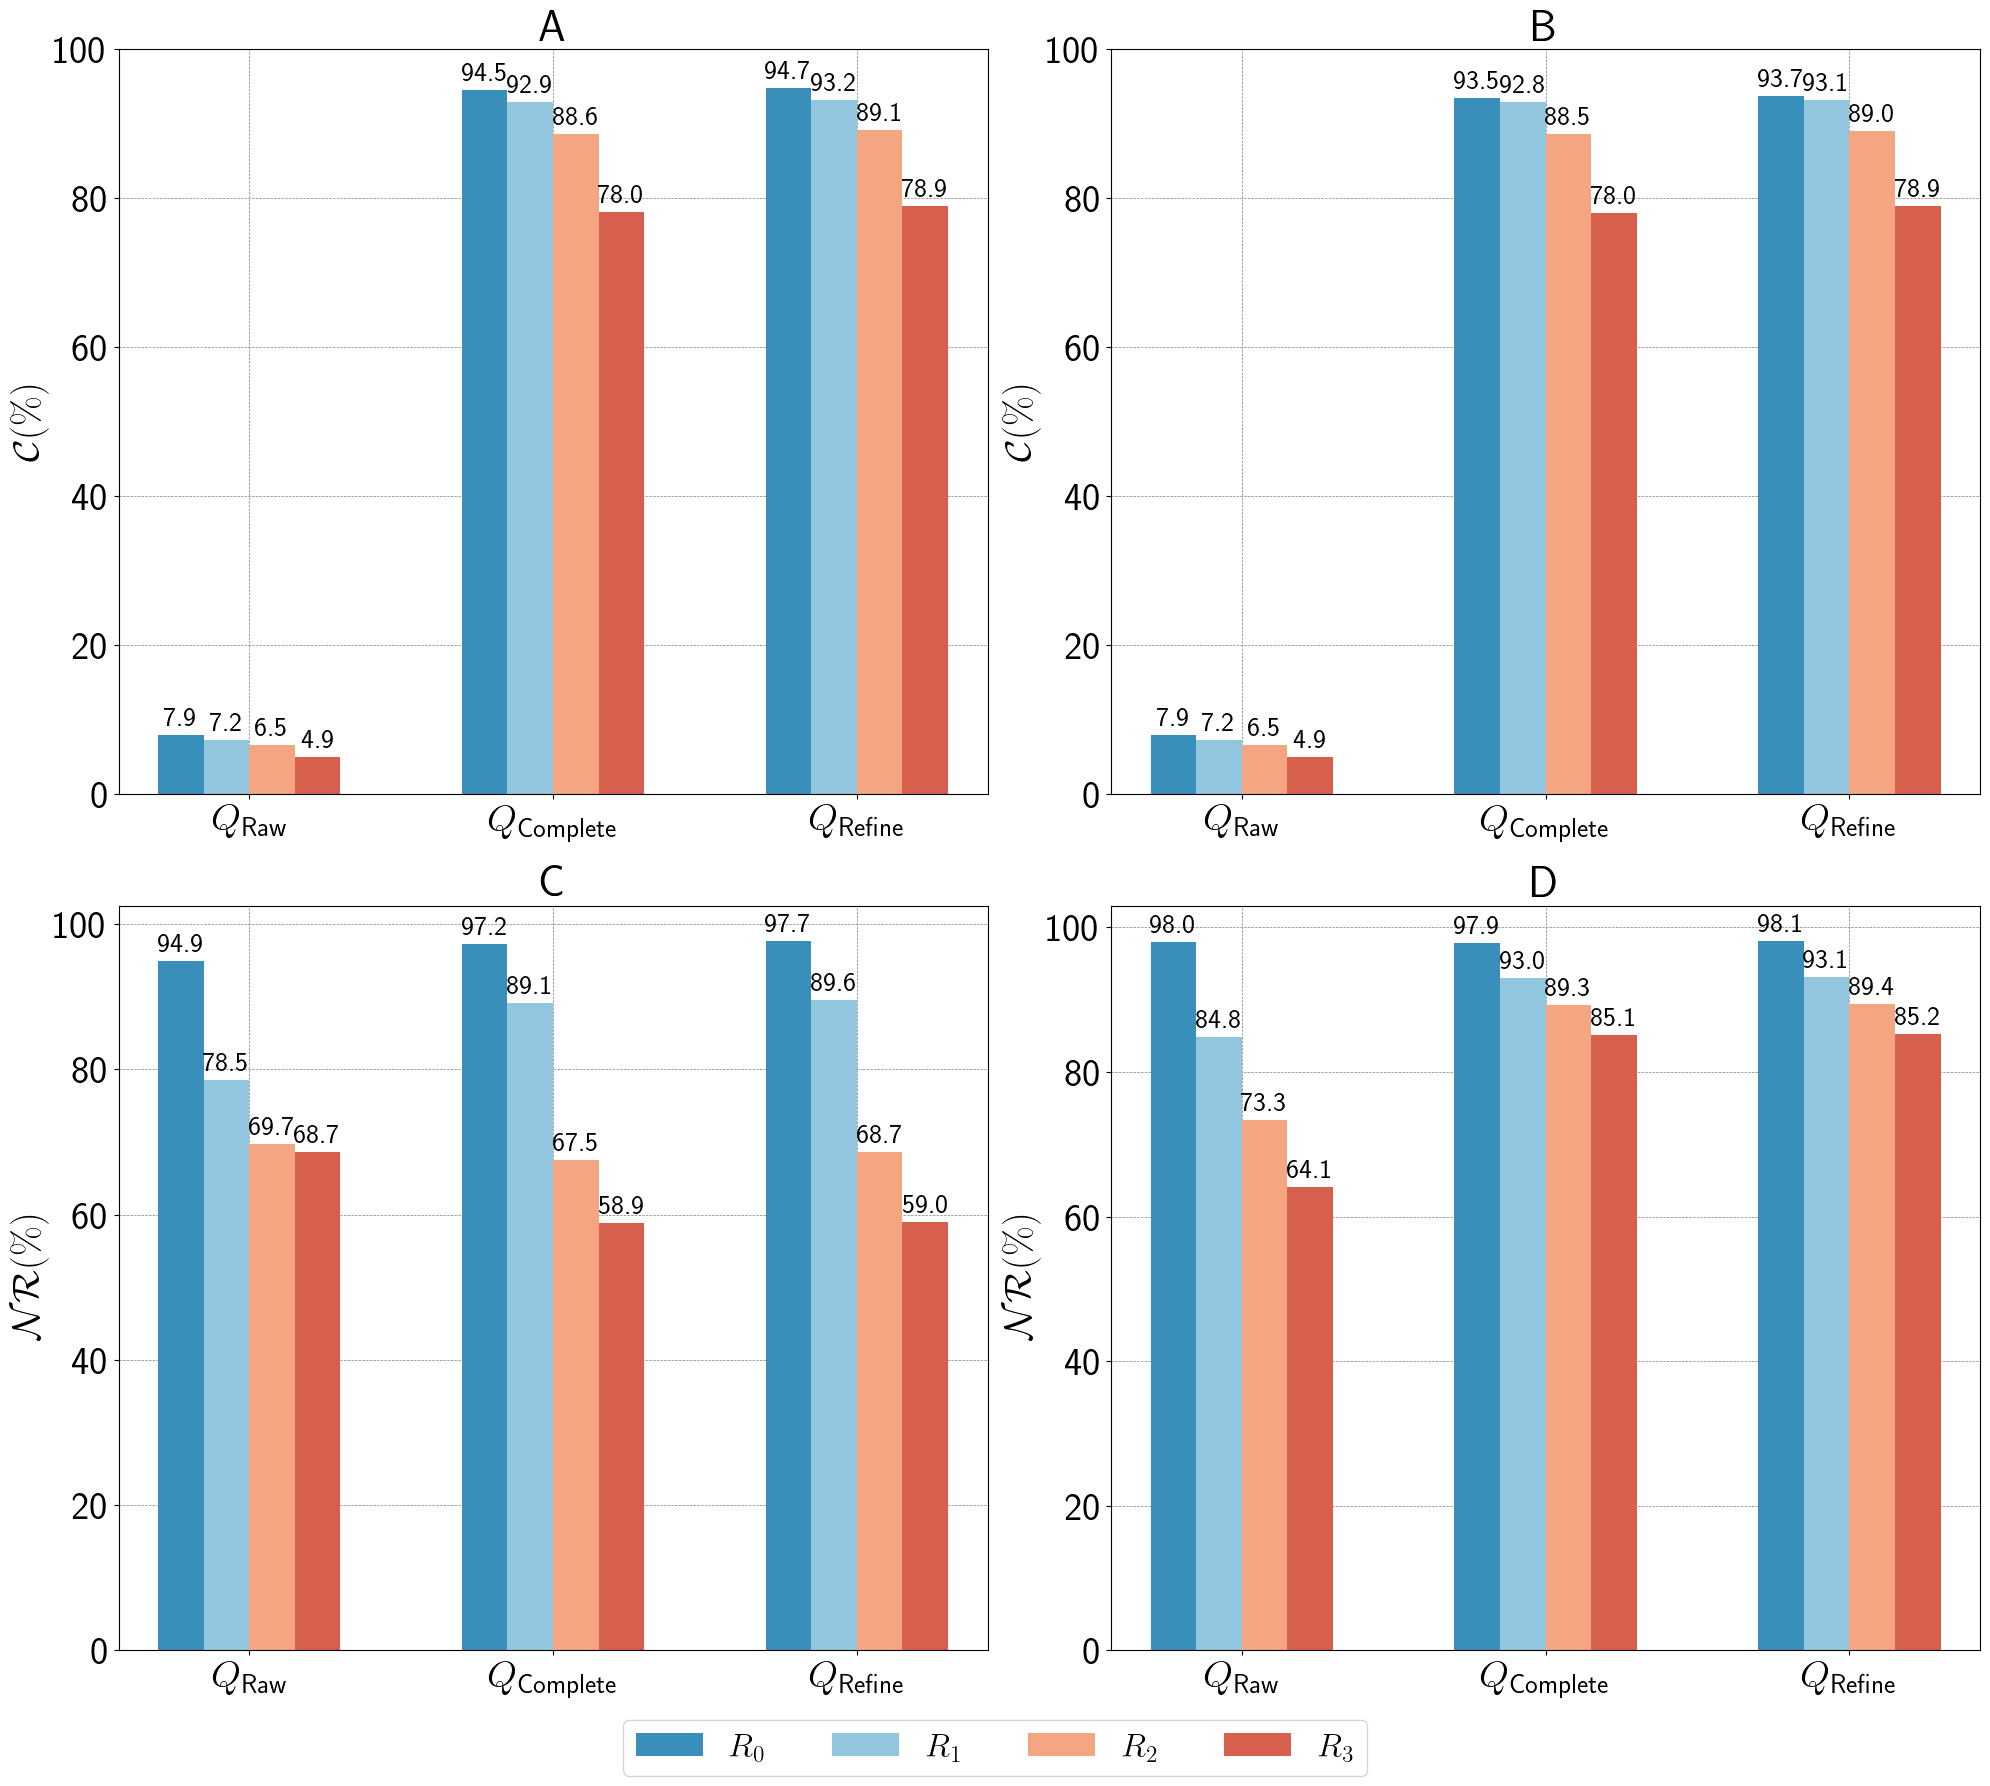

In [54]:
import matplotlib.pyplot as plt

# Creating the figure and subplots
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{amsmath}")  # Ensure amsmath is loaded
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 18))
fontsettings = {
    "title_size": 32,
    "label_size": 28,
    "ticks_size": 28,
    "annotation_size": 20,
}

# Plotting data
plot_percentage(fw, ax1, "C", title=r"A", fontsettings=fontsettings)
plot_percentage(bw, ax2, "C", title=r"B", fontsettings=fontsettings)

plot_percentage(fw, ax3, "NR", title=r"C", fontsettings=fontsettings)
plot_percentage(bw, ax4, "NR", title=r"D", fontsettings=fontsettings)


fig.legend(
    [r"$R_0$", r"$R_1$", r"$R_2$", r"$R_3$"],  # Correct LaTeX formatted strings
    loc="lower center",
    ncol=4,
    fontsize=24,
    bbox_to_anchor=(0.5, 0.001),
)

# Adjusting layout
fig.tight_layout()
fig.subplots_adjust(hspace=0.15, bottom=0.08)
fig.savefig(
    "./fig/template_false_rate_compare_valid.pdf",
    dpi=600,
    bbox_inches="tight",
    pad_inches=0,
)

## 3. ROC curve

In [55]:
import sys
import pandas as pd
import numpy as np

sys.path.append("../../")
from _analysis._rule_app_analysis import load_results_from_json

results = load_results_from_json("../../Data/Temp/Benchmark/raw_results.json")

valid = results["Valid"]

valid_fw = valid["fw"]
valid_bw = valid["bw"]
fw = pd.DataFrame(valid_fw).T
bw = pd.DataFrame(valid_bw).T
fw.rename(
    columns={
        0: "average_solution",
        # 1: r'\mathcal(C)',
        1: "C",
        2: "NR",
    },
    inplace=True,
)
bw.rename(
    columns={
        0: "average_solution",
        # 1: r'\mathcal(C)',
        1: "C",
        2: "NR",
    },
    inplace=True,
)

fw[["Type", "Radii"]] = fw.index.to_series().str.split("_", expand=True)
bw[["Type", "Radii"]] = bw.index.to_series().str.split("_", expand=True)

Results successfully loaded from ../../Data/Temp/Benchmark/raw_results.json


In [175]:
def plot_roc_curves(
    df: pd.DataFrame,
    ax: plt.Axes,
    selected_types: Optional[List[str]] = None,
    fontsettings: Optional[Dict[str, int]] = None,
    title: str = "A",
    add_legend: bool = False,
) -> List[Any]:
    """
    Plot ROC curves for specified types from a DataFrame on a given matplotlib Axes.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data for plotting. Must include columns 'Type', 'C' for TPR,
                       and 'FPR' for FPR, where 'Type' differentiates data series.
    ax (plt.Axes): The matplotlib Axes object where the ROC curves will be drawn.
    selected_types (Optional[List[str]]): List of strings representing the types to be included in the plot.
                                          If None, all types in the DataFrame will be plotted.
    fontsettings (Optional[Dict[str, int]]): Dictionary containing font settings for titles, labels,
                                             ticks, and annotations. If None, defaults will be applied.
    title (str): Title of the plot.
    add_legend (bool): If True, add a legend to the plot.

    Returns:
    List[Any]: List containing matplotlib line handles for the legend, useful if further customization
               or reference is needed.

    Raises:
    ValueError: If selected_types is provided and contains non-string elements.

    Example:
    >>> fig, ax = plt.subplots()
    >>> data = pd.DataFrame({
    ...     'Type': ['Type1', 'Type1', 'Type2', 'Type2'],
    ...     'C': [90, 85, 88, 80],
    ...     'FPR': [5, 10, 5, 10]
    ... })
    >>> plot_roc_curves(data, ax, ['Type1', 'Type2'])
    >>> plt.show()
    """
    if selected_types is not None:
        if not all(isinstance(t, str) for t in selected_types):
            raise ValueError("selected_types must be a list of strings.")
        original_types = [t for t in selected_types if t in df["Type"].unique()]
    else:
        original_types = df["Type"].unique()

    types = [f"$Q_{{\\text{{{t}}}}}$" for t in original_types]

    if fontsettings is None:
        fontsettings = {
            "title_size": 28,
            "label_size": 24,
            "ticks_size": 24,
            "annotation_size": 18,
        }

    markers = ["o", "^", "s", "p"]
    markers.reverse()
    marker_labels = [r"$R_{0}$", r"$R_{1}$", r"$R_{2}$", r"$R_{3}$"]
    marker_labels.reverse()
    marker_color = "gray"

    colors = plt.cm.coolwarm(np.linspace(0, 1, len(types)))
    colors = ["#3A8EBA", "#D6604D"]
    legend_handles = []

    for index, type_ in enumerate(original_types):
        type_data = df[df["Type"] == type_]
        tpr = type_data["C"].tolist()
        fpr = type_data["NR"].tolist()
        tpr = [x / 100 for x in tpr]
        fpr = [x / 100 for x in fpr]
        tpr.reverse()
        fpr.reverse()

        (line,) = ax.plot(
            fpr, tpr, linestyle="-", color=colors[index], label=f"{types[index]}"
        )
        legend_handles.append(line)

        for i, (f, t) in enumerate(zip(fpr, tpr)):
            marker = ax.plot(
                f, t, marker=markers[i % len(markers)], color=marker_color
            )[0]
            if index == 1:
                marker_handle = plt.Line2D(
                    [0],
                    [0],
                    marker=markers[i % len(markers)],
                    color="none",
                    markerfacecolor=marker_color,
                    markersize=10,
                    label=marker_labels[i],
                )
                legend_handles.append(marker_handle)

    ax.set_xlabel(r"$\mathcal{NR}\ (\%)$", fontsize=fontsettings["label_size"])
    ax.set_ylabel(r"$\mathcal{C}\ (\%)$", fontsize=fontsettings["label_size"])
    ax.set_title(rf"{title}", fontsize=fontsettings["title_size"], weight="medium")
    ax.tick_params(axis="both", which="major", labelsize=fontsettings["ticks_size"])
    ax.grid(True)

    if add_legend:
        ax.legend(
            handles=legend_handles,
            loc="lower right",
            fancybox=True,
            title_fontsize=fontsettings["label_size"],
            fontsize=fontsettings["annotation_size"],
            ncol=3,
        )

    ax.grid(True)
    return legend_handles

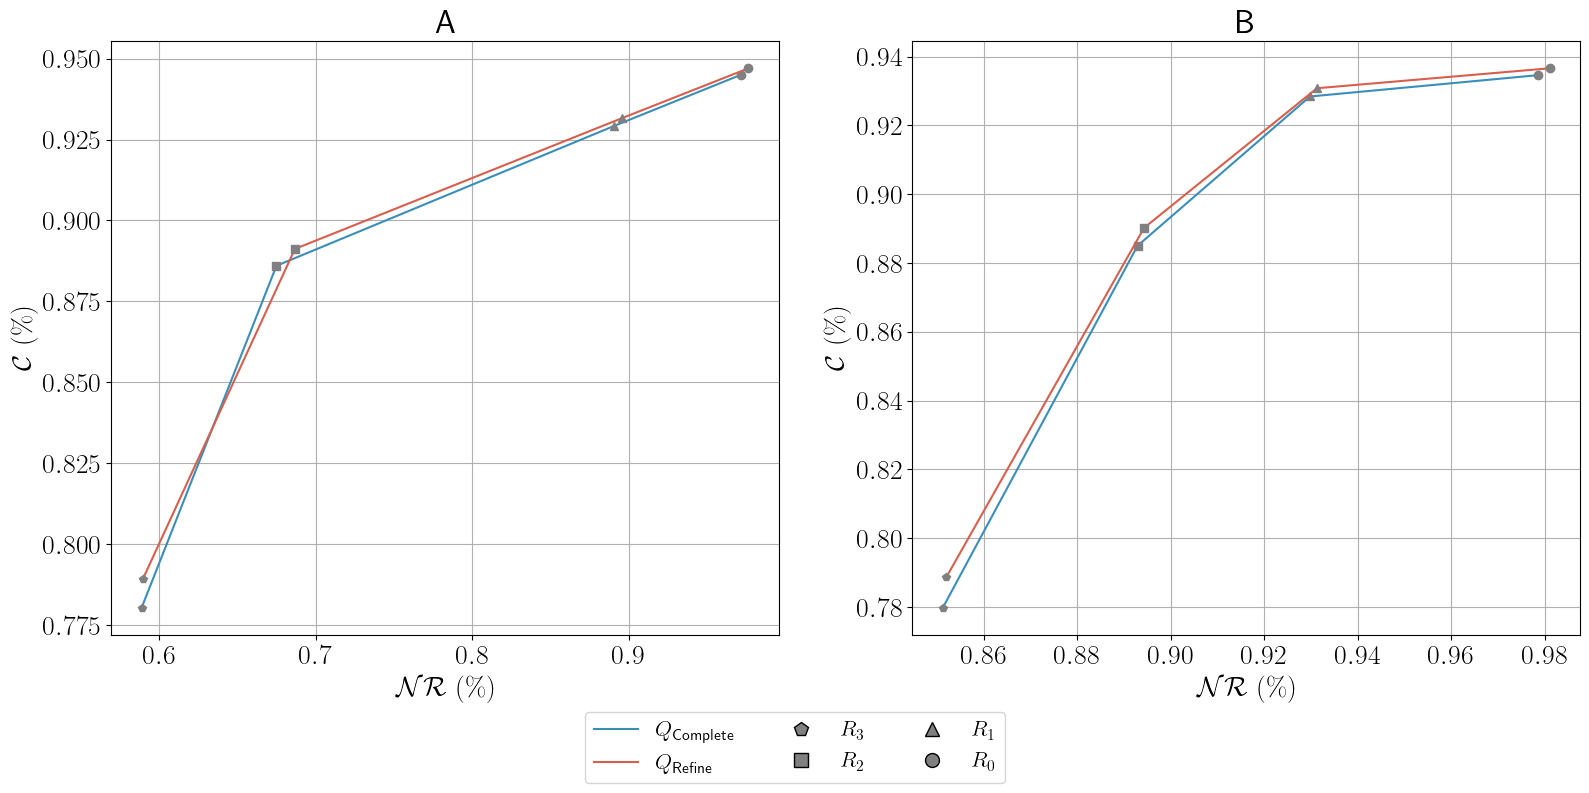

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns
#from _analysis._rule_app_analysis import plot_roc_curves

plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{amsmath}")  # Ensure amsmath is loaded
fontsettings = {
    "title_size": 24,
    "label_size": 20,
    "ticks_size": 20,
    "annotation_size": 16,
}
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
plot_roc_curves(
    fw,
    axs[0],
    selected_types=["Complete", "Refine"],
    fontsettings=fontsettings,
    title="A",
)
legend_handles = plot_roc_curves(
    bw,
    axs[1],
    selected_types=["Complete", "Refine"],
    fontsettings=fontsettings,
    title="B",
)

fig.legend(
    handles=legend_handles,
    loc="lower center",
    fancybox=True,
    title_fontsize=fontsettings["label_size"],
    fontsize=fontsettings["annotation_size"],
    ncol=3,
    bbox_to_anchor=(0.5, 0.001),
)

fig.tight_layout()
fig.subplots_adjust(hspace=0.15, wspace=0.2, bottom=0.2)
#fig.savefig("./fig/ROC_test.pdf", dpi=600, bbox_inches="tight", pad_inches=0)

## G-mean

In [155]:
import sys
import pandas as pd
import numpy as np

sys.path.append("../../")
from _analysis._rule_app_analysis import load_results_from_json

results = load_results_from_json("../../Data/Temp/Benchmark/raw_results.json")

valid = results["Valid"]

valid_fw = valid["fw"]
valid_bw = valid["bw"]
fw = pd.DataFrame(valid_fw).T
bw = pd.DataFrame(valid_bw).T
fw.rename(
    columns={
        0: "AG",
        # 1: r'\mathcal(C)',
        1: "C",
        2: "NR",
    },
    inplace=True,
)
bw.rename(
    columns={
        0: "AG",
        # 1: r'\mathcal(C)',
        1: "C",
        2: "NR",
    },
    inplace=True,
)

fw[["Type", "Radii"]] = fw.index.to_series().str.split("_", expand=True)
bw[["Type", "Radii"]] = bw.index.to_series().str.split("_", expand=True)

Results successfully loaded from ../../Data/Temp/Benchmark/raw_results.json


In [198]:
def gmean(tpr, fpr):
    tnr = 1 - fpr  # True Negative Rate
    g_mean = (tpr+tnr)/2
    return g_mean


# Calculate G-mean for each row and add it as a new column
fw["Sc-forward"] = fw.apply(
    lambda row: gmean(row["C"] / 100, row["NR"] / 100), axis=1
)
bw["Sc-backward"] = bw.apply(
    lambda row: gmean(row["C"] / 100, row["NR"] / 100), axis=1
)

In [199]:
fw

,AG,C,NR,Type,Radii,G-mean-forward,G-mean,Sc-forward
Raw_0,4.04,7.86,94.87,Raw,0,0.06495,0.056351,0.06495
Raw_1,0.79,7.24,78.52,Raw,1,0.14360,0.023916,0.14360
Raw_2,0.33,6.50,69.74,Raw,2,0.18380,0.014646,0.18380
Raw_3,0.23,4.92,68.67,Raw,3,0.18125,0.010638,0.18125
Complete_0,71.13,94.50,97.18,Complete,0,0.48660,0.819865,0.48660
Complete_1,22.88,92.92,89.08,Complete,1,0.51920,0.461087,0.51920
Complete_2,5.30,88.60,67.50,Complete,2,0.60550,0.216698,0.60550
Complete_3,3.22,78.03,58.88,Complete,3,0.59575,0.158511,0.59575
Refine_0,84.29,94.70,97.66,Refine,0,0.48520,0.893435,0.48520
Refine_1,23.78,93.16,89.58,Refine,1,0.51790,0.470674,0.51790


In [200]:
valid_result = pd.concat(
    [fw["Sc-forward"], bw[["Sc-backward", "Type", "Radii"]]], axis=1
)

In [201]:
valid_result

,Sc-forward,Sc-backward,Type,Radii
Raw_0,0.06495,0.04935,Raw,0
Raw_1,0.14360,0.11200,Raw,1
Raw_2,0.18380,0.16600,Raw,2
Raw_3,0.18125,0.20425,Raw,3
Complete_0,0.48660,0.47800,Complete,0
Complete_1,0.51920,0.49930,Complete,1
Complete_2,0.60550,0.49605,Complete,2
Complete_3,0.59575,0.46425,Complete,3
Refine_0,0.48520,0.47775,Refine,0
Refine_1,0.51790,0.49975,Refine,1


In [182]:
test_result = pd.concat(
    [fw["G-mean-forward"], bw[["G-mean-backward", "Type", "Radii"]]], axis=1
)

In [177]:
def gmean(tpr, fpr):
  
    tnr = 1 - fpr  # True Negative Rate

    g_mean = np.sqrt(tpr * fpr)
    return g_mean


# Calculate G-mean for each row and add it as a new column
fw["G-mean"] = fw.apply(lambda row: gmean(row["C"] / 100, row["AG"] / 100), axis=1)
bw["G-mean"] = bw.apply(lambda row: gmean(row["C"] / 100, row["AG"] / 100), axis=1)

In [178]:
fw

,AG,C,NR,Type,Radii,G-mean-forward,G-mean
Raw_0,4.04,7.86,94.87,Raw,0,0.063499,0.056351
Raw_1,0.79,7.24,78.52,Raw,1,0.124706,0.023916
Raw_2,0.33,6.50,69.74,Raw,2,0.140246,0.014646
Raw_3,0.23,4.92,68.67,Raw,3,0.124155,0.010638
Complete_0,71.13,94.50,97.18,Complete,0,0.163245,0.819865
Complete_1,22.88,92.92,89.08,Complete,1,0.318541,0.461087
Complete_2,5.30,88.60,67.50,Complete,2,0.536610,0.216698
Complete_3,3.22,78.03,58.88,Complete,3,0.566444,0.158511
Refine_0,84.29,94.70,97.66,Refine,0,0.148862,0.893435
Refine_1,23.78,93.16,89.58,Refine,1,0.311565,0.470674


In [179]:
g_mean_results = {}

for type_, group in fw.groupby("Type"):
    tpr = (
        group["C"] / 100
    )  # True Positive Rate (C is already in percentage, so divide by 100)
    fpr = group["FPR"] / 100  # False Positive Rate
    tnr = 1 - fpr  # True Negative Rate
    g_mean = np.sqrt(tpr * tnr).mean()  # Geometric Mean
    g_mean_results[type_] = g_mean

# Output the G-mean results for each Type
g_mean_results

KeyError: 'FPR'

## 4. Time processing

In [135]:
from datetime import datetime


def calculate_time_difference(log_file_path):
    # Define the time format from the logs
    time_format = "%Y-%m-%d %H:%M:%S,%f"

    # Initialize variables to store timestamps
    start_time = None
    end_time = None

    # Open and read the log file
    with open(log_file_path, "r") as file:
        for line in file:
            # Check if line contains the start process timestamp
            if "Start process" in line:
                timestamp_str = line.split(" - ")[0]
                start_time = datetime.strptime(timestamp_str, time_format)

            # Check if line contains the forward prediction validation timestamp
            elif "Forward Prediction Validation" in line:
                timestamp_str = line.split(" - ")[0]
                end_time = datetime.strptime(timestamp_str, time_format)

    # Ensure both timestamps are found
    if start_time is None or end_time is None:
        raise ValueError(
            "Timestamps for 'Start process' or 'Forward Prediction Validation' not found in the log file."
        )

    # Calculate the time difference
    time_difference = end_time - start_time
    total_seconds = time_difference.total_seconds()

    return total_seconds


# Example usage
log_file_path = "../../Data/Temp/Benchmark/Raw/Log/Valid"

In [136]:
radius = [0, 1, 2, 3]
result = []
for i in radius:
    try:
        total_seconds = calculate_time_difference(
            log_file_path=f"{log_file_path}/r{i}.txt"
        )
        result.append(total_seconds)
    except:
        result.append(None)

In [137]:
result

[10067.556, 36444.666, 213271.507, 458275.105]

In [153]:
valid_times_compare = {
    r"$Q_{\text{raw}}$": [7248.640, 19696.1595, 153555.485, 329958.076],
    r"$Q_{\text{complete}}$": [7488.947, 20696.089, 160297.79, 384013.142],
    r"$Q_{\text{refine}}$": [8560.03, 21858.446, 166933.66, 400155.498],
}

In [ ]:
test_times_compare = {
    r"$Q_{\text{raw}}$": [9967.84, 34812.77, 214118.684, 460135.812],
    r"$Q_{\text{complete}}$": [5553.019, 17230.426, 170896.315, 450532.96],
    r"$Q_{\text{expand}}$": [11065.185, 36902.738, 215238.352, 466254.943],
}

In [62]:
from _analysis._rule_app_analysis import plot_processing_times

In [93]:
def plot_processing_times(
    times: Dict[str, List[float]], ax: Optional[plt.Axes] = None, title: str = "A"
) -> None:
    """
    Plot processing times for various methods across different stages.

    This function takes a dictionary of processing times, converts them into hours,
    and plots them using a bar chart.

    Parameters:
    times (Dict[str, List[float]]): A dictionary where keys are method names and values
                                    are lists of processing times in seconds for each stage.
    ax (Optional[plt.Axes]): Matplotlib Axes object where the plot will be drawn. If None,
                             the current active Axes will be used.
    title (str): The title of the plot.

    Returns:
    None: The function creates a plot but does not return any value.

    Example:
    >>> times = {
    ...     "Method1": [3600, 7200, 1800, 5400],
    ...     "Method2": [1800, 3600, 900, 2700],
    ... }
    >>> fig, ax = plt.subplots()
    >>> plot_processing_times(times, ax=ax, title="Processing Times Analysis")
    >>> plt.show()
    """
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"\usepackage{amsmath}")  # Ensure amsmath is loaded
    # Convert to hours
    for key in times:
        times[key] = np.array(times[key]) / 3600

    # Stages
    stages = [r"$R_{0}$", r"$R_{1}$", r"$R_{2}$", r"$R_{3}$"]

    # Create a DataFrame
    df = (
        pd.DataFrame(times, index=stages)
        .reset_index()
        .melt(id_vars="index", var_name="Method", value_name="Time (hours)")
    )
    df.rename(columns={"index": "Stage"}, inplace=True)

    # Create the plot on the provided ax
    if ax is None:
        ax = plt.gca()  # Get current axis if not provided

    custom_colors = ["#5e4fa2", "#3A8EBA", "#D6604D"]
    palette = sns.color_palette(custom_colors[: len(times.keys())])
    bar_plot = sns.barplot(
        x="Stage", y="Time (hours)", hue="Method", data=df, palette=palette, ax=ax
    )

    ax.set_title(rf"{title}", fontsize=24, weight="bold")
    ax.set_xlabel(None)
    ax.set_ylabel(rf"Time (Hours)", fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
    ax.set_yticklabels([rf"{y:.0f}" for y in ax.get_yticks()], fontsize=20)
    ax.legend(
        title="Template Type",
        title_fontsize="24",
        fontsize="20",
        loc="upper left",
        bbox_to_anchor=(0.01, 1),
    )

    # Add text annotations on the bars
    for p in bar_plot.patches:
        bar_height = p.get_height()
        if bar_height > 0.01:  # Adjust this threshold as needed
            annotation = format(
                p.get_height(), ".1f" if p.get_height() < 100 else ".0f"
            )
            ax.annotate(
                rf"{annotation}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center",
                va="center",
                xytext=(0, 9),
                textcoords="offset points",
                fontsize=20,
            )

    ax.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()

/tmp/ipykernel_1881606/50864145.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
/tmp/ipykernel_1881606/50864145.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([rf"{y:.0f}" for y in ax.get_yticks()], fontsize=20)


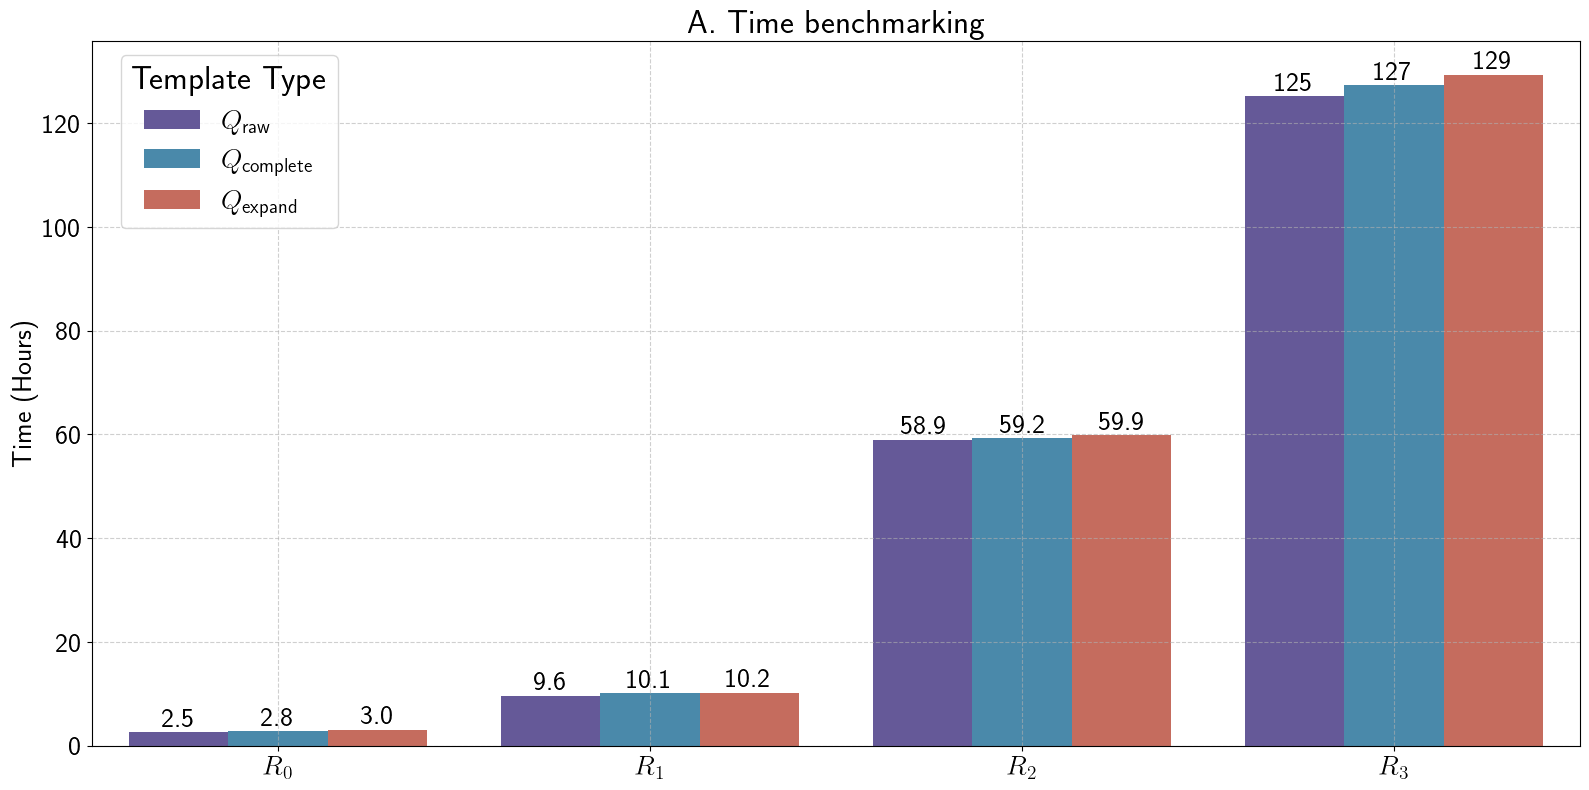

In [94]:
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{amsmath}")  # Ensure amsmath is loaded
fig, axs = plt.subplots(1, 1, figsize=(16, 8))
plot_processing_times(valid_times_compare, ax=axs, title="A. Time benchmarking")
# plot_processing_times(test_times_compare, ax=axs[1], title = 'B')
# fig.savefig('../../time_process_rule', bbox_inches='tight', pad_inches=0)

In [64]:
import sys
import pandas as pd
import numpy as np

sys.path.append("../../")
from _analysis._rule_app_analysis import load_results_from_json

results = load_results_from_json("../../Data/Temp/Benchmark/raw_results.json")

valid = results["Valid"]

valid_fw = valid["fw"]
valid_bw = valid["bw"]
fw = pd.DataFrame(valid_fw).T
bw = pd.DataFrame(valid_bw).T
fw.rename(
    columns={
        0: "average_solution",
        # 1: r'\mathcal(C)',
        1: "C",
        2: "NR",
    },
    inplace=True,
)
bw.rename(
    columns={
        0: "average_solution",
        # 1: r'\mathcal(C)',
        1: "C",
        2: "NR",
    },
    inplace=True,
)

fw[["Type", "Radii"]] = fw.index.to_series().str.split("_", expand=True)
bw[["Type", "Radii"]] = bw.index.to_series().str.split("_", expand=True)

Results successfully loaded from ../../Data/Temp/Benchmark/raw_results.json


/tmp/ipykernel_1881606/50864145.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
/tmp/ipykernel_1881606/50864145.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([rf"{y:.0f}" for y in ax.get_yticks()], fontsize=20)


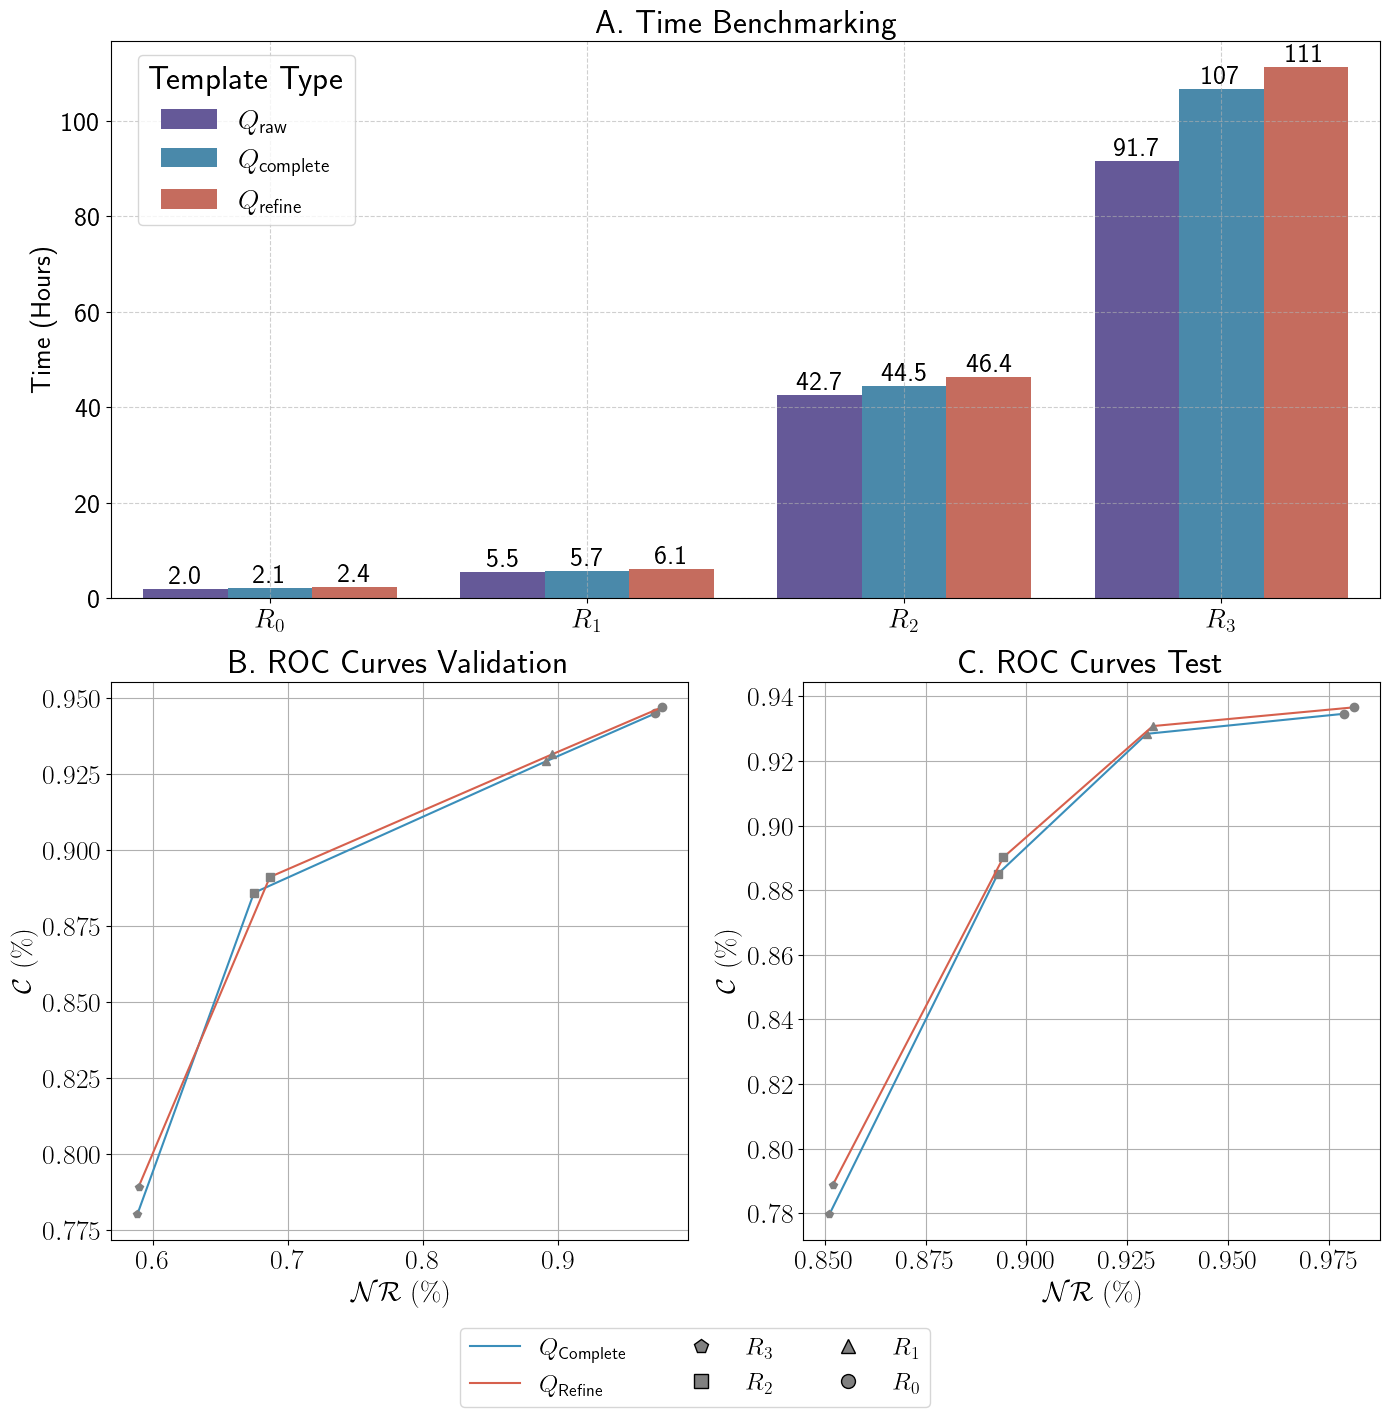

In [154]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have functions like plot_roc_curves and plot_processing_times already defined

# Set up font settings and LaTeX for plot text
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{amsmath}")  # Ensure amsmath is loaded
fontsettings = {
    "title_size": 24,
    "label_size": 20,
    "ticks_size": 20,
    "annotation_size": 16,
}

# Create a 2x2 subplot layout
fig, axs = plt.subplots(
    2, 2, figsize=(14, 15)
)  # Adjusted figure size for better layout

# Plot time processing in the first row, spanning both columns
axs[0, 0].remove()  # Remove the original first subplot in the first row
axs[0, 1].remove()  # Remove the second subplot in the first row
ax_time = fig.add_subplot(2, 2, (1, 2))  # Add a new subplot that spans the first row
plot_processing_times(valid_times_compare, ax=ax_time, title=r"A. Time Benchmarking")

# Plot ROC curves in the second row
legend_handles_fw = plot_roc_curves(
    fw,
    axs[1, 0],
    selected_types=["Complete", "Refine"],
    fontsettings=fontsettings,
    title=r"B. ROC Curves Validation",
)
legend_handles_bw = plot_roc_curves(
    bw,
    axs[1, 1],
    selected_types=["Complete", "Refine"],
    fontsettings=fontsettings,
    title=r"C. ROC Curves Test",
)

# Combine legends from the ROC curves
fig.legend(
    handles=legend_handles_fw,
    loc="lower center",
    fancybox=True,
    title_fontsize=fontsettings["label_size"],
    fontsize=fontsettings["annotation_size"],
    ncol=3,
    bbox_to_anchor=(0.5, 0.05),
    prop={"size": 18},
)

# Adjust layout for better visual display
fig.tight_layout()
fig.subplots_adjust(
    hspace=0.15, wspace=0.2, bottom=0.17
)  # Adjust spacing to accommodate the legend
fig.savefig(
    "../../Docs/Analysis/fig/time_process_rule.pdf",
    dpi=600,
    bbox_inches="tight",
    pad_inches=0,
)
plt.show()